In [334]:
import pandas as pd
from scipy.stats import f_oneway, shapiro, mannwhitneyu
import matplotlib.pyplot as plt

In [302]:
dataset = pd.read_excel("../Projekty/Studenci/Analysis-of-students/dataset.xlsx")
dataset.head()

,ID,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,s_17,s_18,s_19,s_20,s_21,s_22,s_23,s_24,s_25,s_26
0,1,2,22,3,1,4,1,1,1,1,...,3,2,2,3,2,5,3,5,3,3
1,2,2,22,3,2,5,1,1,0,0,...,1,1,4,4,5,5,1,5,5,2
2,3,2,22,4,1,3,1,1,0,1,...,3,3,1,5,5,5,1,5,5,4
3,4,2,22,3,2,4,1,1,0,1,...,5,4,3,4,4,2,2,4,2,3
4,5,2,23,3,1,4,1,1,1,0,...,4,1,4,5,5,5,1,2,5,5


# The impact of work on students' grades
<hr>

<br>Dependent variable: GPA</br>
<br>Levels of independent variable: </br>
<li> working </li>
<li> not working </li>
<br>
<br>Hypotesis: </br>
<li>H0: there is no difference among group means </li>
<li>H1: is that at least one group differs significantly from the overall mean of the dependent variable </li>

In [303]:
# GPA - pyt_2
# Work - M7

impact_of_work = dataset[['pyt_2', 'M7']]
impact_of_work.head()

,pyt_2,M7
0,4.80,1
1,3.92,1
2,4.25,1
3,4.50,1
4,4.80,1


In [304]:
#Creating subsets for levels of independent variable
working = dataset.loc[dataset['M7'] == 1, 'pyt_2'].reset_index(drop=True)
not_working= dataset.loc[dataset['M7'] == 0, 'pyt_2'].reset_index(drop=True)


In [338]:
working.describe().drop(['min','max'])

count    40.000000
mean      4.309000
std       0.411394
25%       4.000000
50%       4.250000
75%       4.712500
Name: pyt_2, dtype: float64

In [337]:
not_working.describe().drop(['min','max'])

count    20.000000
mean      4.162500
std       0.503774
25%       3.837500
50%       4.150000
75%       4.567500
Name: pyt_2, dtype: float64

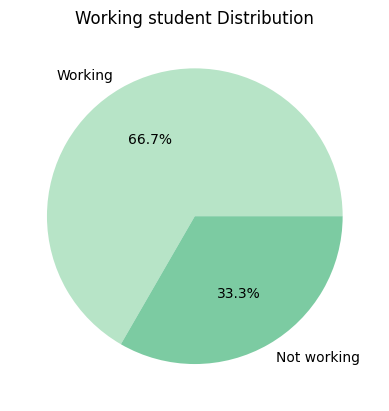

In [307]:
#counting the number of values in specific categories
counts = dataset['M7'].value_counts()


#creating a piechart
colors = ['#B7E4C7', '#7CCBA2']

plt.pie(counts, labels=counts.index.map({1: 'Working', 0: 'Not working'}), colors=colors, autopct='%1.1f%%')
plt.title('Working student Distribution')
plt.show()

<h5><br> The assumptions of one-way anova are: </br></h5>
<li>The responses for each factor level have a normal population distribution </li>
<li>These distributions have the same variance </li>
<li>The data are independent </li>

<h4 style='color:blue';>Test: Shapiro-Wilk</h4>
Hypotheses:
<li>H0(Accepted): Sample is from the normal distributions.(Po>0.05)</li>
<li>H1(Rejected): Sample is not from the normal distributions.</li>
<br>
If p_value > 0.05 (alpha) we fail to reject the null hypothesis i.e. we do not have sufficient evidence to say that sample does not come from a normal distribution.

In [308]:
#testing normal population distribution 

shapiro(working)

ShapiroResult(statistic=0.9333128333091736, pvalue=0.020687872543931007)

p_value < 0.05 therefore we reject the hypothesis of normal distribution

In [309]:
shapiro(not_working)

ShapiroResult(statistic=0.9411163926124573, pvalue=0.2516973614692688)

p_value > 0.05 therefore we do not reject the hypothesis of normal distribution

Data are independent but as one of the level of the independent variable does not meet the assumptions we have to choose non-parametric test (we do not have to check the assumption of same variance as all of the assumptions have to be met) 

https://www.theopeneducator.com/doe/hypothesis-Testing-Inferential-Statistics-Analysis-of-Variance-ANOVA/Single-Population-Testing

<br>
<h4 style='color:blue';>Mann-Whitney U Test </h3>

Hypotheses:
<li>H0: two populations are equal.</li>
<li>H1: two populations are not equal.</li>
<br>

The assumption is that data are indepedent.

In [310]:
mannwhitneyu(working, not_working)

MannwhitneyuResult(statistic=478.5, pvalue=0.2209053155897489)

<p style='color: darkgreen;'>Since the p-value is more than 0.05 hence we would <b>not reject the null hypothesis </b>. This implies that we <u> do not have sufficient proof to say that there exists a difference in the GPA among working and not working students</u>.<p/>

# The impact of type of studies (full time/part time) on students' grades
<hr>

<br>Dependent variable: GPA</br>
<br>Levels of independent variable: </br>
<li> full time studies</li>
<li> part time studies </li>
<br>
<br>Hypotesis: </br>
<li>H0: there is no difference among group means </li>
<li>H1: is that at least one group differs significantly from the overall mean of the dependent variable </li>

In [311]:
# GPA - pyt_2
# Type od studies - pyt_3

impact_of_studies = dataset[['pyt_2', 'pyt_3']]
impact_of_studies.head()

,pyt_2,pyt_3
0,4.80,2
1,3.92,2
2,4.25,2
3,4.50,2
4,4.80,2


In [312]:
#Creating subsets for levels of independent variable
full_time = dataset.loc[dataset['pyt_3'] == 1, 'pyt_2'].reset_index(drop=True)
part_time= dataset.loc[dataset['pyt_3'] == 2, 'pyt_2'].reset_index(drop=True)

In [339]:
full_time.describe().drop(['min','max'])

count    37.000000
mean      4.131351
std       0.462446
25%       3.850000
50%       4.150000
75%       4.500000
Name: pyt_2, dtype: float64

In [340]:
part_time.describe().drop(['min','max'])

count    23.000000
mean      4.467391
std       0.330856
25%       4.175000
50%       4.500000
75%       4.770000
Name: pyt_2, dtype: float64

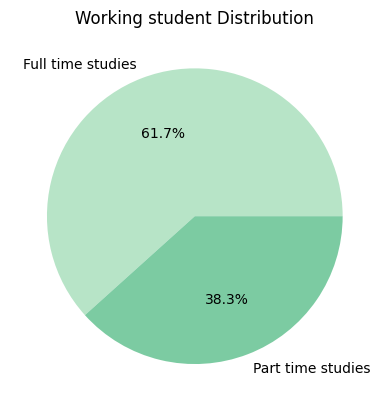

In [315]:
#counting the number of values in specific categories
counts = dataset['pyt_3'].value_counts()


#creating a piechart
colors = ['#B7E4C7', '#7CCBA2']

plt.pie(counts, labels=counts.index.map({1: 'Full time studies', 2: 'Part time studies'}), colors=colors, autopct='%1.1f%%')
plt.title('Types of studies Distribution')
plt.show()

In [316]:
#testing normal population distribution using Shapiro Test

shapiro(full_time)

ShapiroResult(statistic=0.9620391726493835, pvalue=0.23429501056671143)

p_value > 0.05 therefore we do not reject the hypothesis of normal distribution

In [317]:
shapiro(part_time)

ShapiroResult(statistic=0.8833879828453064, pvalue=0.011673561297357082)

p_value < 0.05 therefore we reject the hypothesis of normal distribution

Due to the fact one level of indepenednt varable does not meet the assumption of normal distribution we performed main hypotesis testing using Mann-Whitney U Test

In [318]:
mannwhitneyu(full_time,part_time)

MannwhitneyuResult(statistic=235.0, pvalue=0.0038388260330176967)

<p style='color: darkgreen;'>Since the p-value is less than 0.05 hence we would <b> reject the null hypothesis </b>. This implies that we <u> have sufficient proof to say that there exists a difference in the GPA among full time studies and part time studies students</u>.<p/>

# The impact of gender on students' grades
<hr>

<br>Dependent variable: GPA</br>
<br>Levels of independent variable: </br>
<li> women </li>
<li> men </li>
<br>
<br>Hypotesis: </br>
<li>H0: there is no difference among group means </li>
<li>H1: is that at least one group differs significantly from the overall mean of the dependent variable </li>
<br>
<br>
On the survey there were 4 responsens for equivalent question about gender:
<li>woman</li>
<li>man</li>
<li>other</li>
<li>doesn't matter</li>
For the purpose of the analysis we used only 'man' and 'women' resposnes, because the other ones would not be representative (as the quantities are too small).

In [319]:
# GPA - pyt_2
# gender - M1

impact_of_gender = dataset[['pyt_2', 'M1']]
impact_of_gender.head()

,pyt_2,M1
0,4.80,2
1,3.92,2
2,4.25,2
3,4.50,2
4,4.80,2


In [320]:
#Creating subsets for levels of independent variable
women = dataset.loc[dataset['M1'] == 1, 'pyt_2'].reset_index(drop=True)
men= dataset.loc[dataset['M1'] == 2, 'pyt_2'].reset_index(drop=True)


In [342]:
women.describe().drop(['min','max'])

count    15.000000
mean      4.366667
std       0.559664
25%       4.050000
50%       4.620000
75%       4.750000
Name: pyt_2, dtype: float64

In [343]:
men.describe().drop(['min','max'])

count    42.000000
mean      4.224048
std       0.403938
25%       3.932500
50%       4.175000
75%       4.500000
Name: pyt_2, dtype: float64

In [323]:
#Creating susbet without irrelevant answers for pie chart (only answers 1 (woman) and 2 (man))
relevant_gender = dataset[dataset['M1'].isin([1, 2])].reset_index(drop=True)

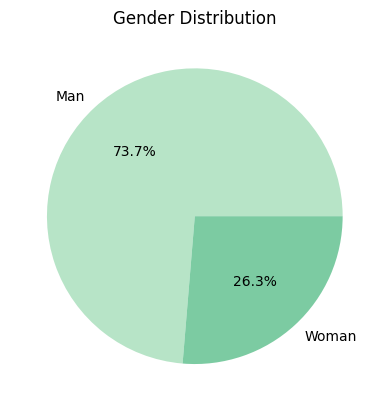

In [324]:
counts = relevant_gender['M1'].value_counts()

colors = ['#B7E4C7', '#7CCBA2']
plt.pie(counts, labels=counts.index.map({1: 'Woman', 2: 'Man'}), colors=colors, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [325]:
#testing normal population distribution using Shapiro-Wilk Test

shapiro(women)

ShapiroResult(statistic=0.8068519830703735, pvalue=0.0045073810033500195)

p_value < 0.05 therefore we reject the hypothesis of normal distribution

In [326]:
shapiro(men)

ShapiroResult(statistic=0.9621137976646423, pvalue=0.17571404576301575)

p_value > 0.05 therefore we do not reject the hypothesis of normal distribution

Due to the fact one level of indepenednt varable does not meet the assumption of normal distribution we performed main hypotesis testing using Mann-Whitney U Test

In [327]:
mannwhitneyu(women,men)

MannwhitneyuResult(statistic=401.0, pvalue=0.12097630255464942)

<p style='color: darkgreen;'>Since the p-value is more than 0.05 hence we would <b>not reject the null hypothesis </b>. This implies that we <u> do not have sufficient proof to say that there exists a difference in the GPA among female and male students</u>.<p/>

It should be considered whether the results are reliable as there is small group of women in sample.

<H1> Conclusions </h2>
<hr>

All analyses were performed using the Mann-Whitney U test as non of independent variable met the assumptions crucial for using parametrical tests. 
The results show that whether a student works or not does not affect their GPA. However, the type of study (part-time or full-time) does have an impact on the GPA, with part-time students achieving slighlty higher grades than full-time students. Lastly, gender does not seem to have a significant effect on GPA.